In [275]:
import pandas as pd
import numpy as np
import datetime
import os
pd.options.mode.chained_assignment = None

In [276]:
main_df = pd.read_pickle("clean_df.pkl")

In [277]:
main_df.head()

,Internal_Case_ID,Gender,Race,Ethnicity,Age_at_Crime,Age_at_Arrest,Court_Name,Court_ORI,County_Name,District,...,prior_misd_cnt,pend_vfo,pend_nonvfo,pend_misd,supervision,rearrest,rearrest_date,rearrest_firearm,rearrest_date_firearm,arr_cycle_id
0,0x866BC1A9D02C2D5D8C5E012A1263CBCB186AAD4EC432...,Female,White,Unknown,32.0,NaN,Queens Criminal Court,NY040033J,Queens,District 11,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaT,0.0,NaT,NaN
1,0x19CE12EEBB600591525A623342A703545C8217AECBED...,Male,Black,Non Hispanic,38.0,38.0,New York Criminal Court,NY030033J,New York,District 1,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaT,0.0,NaT,325544.0
2,0xF7CC1FA4C28B406C23DB333B96623EE4B85C447CA524...,Male,Unknown,Unknown,31.0,31.0,Syracuse City Court,NY033011J,Onondaga,District 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
3,0x6D65E9BD03FE9F08760481FD325804F8F74FF2C874E1...,Unknown,Unknown,Unknown,28.0,28.0,Rome City Court,NY032011J,Oneida,District 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
4,0xB9F29E48ABC1069053C191061BB6B3B0792DBCD96FD1...,Male,White,Non Hispanic,36.0,36.0,New York Criminal Court,NY030033J,New York,District 1,...,10.0,0.0,1.0,1.0,0.0,Misdemeanor,2020-01-01,0.0,NaT,355075.0


In [278]:
req_col = ['Gender', 'Age_at_Crime', 'Race','Ethnicity','Offense_Date', 'Arraign Charge Category', 'Representation_Type','Release Decision at Arraign']

In [279]:
bail_df = main_df.filter(req_col)

In [280]:
bail_df  

,Gender,Age_at_Crime,Race,Ethnicity,Offense_Date,Arraign Charge Category,Representation_Type,Release Decision at Arraign
0,Female,32.0,White,Unknown,NaT,Criminal Contempt,Legal Aid,ROR
1,Male,38.0,Black,Non Hispanic,2019-11-01,Assault,Public Defender,ROR
2,Male,31.0,Unknown,Unknown,2017-04-01,Unlicensed Operation,18B (Assigned Counsel),ROR
3,Unknown,28.0,Unknown,Unknown,2017-04-01,Unlicensed Operation,Public Defender,Disposed at arraign
4,Male,36.0,White,Non Hispanic,2020-01-01,Larceny,Legal Aid,Nonmonetary release
...,...,...,...,...,...,...,...,...
284093,Male,41.0,Black,Non Hispanic,2021-03-01,Drug,Legal Aid,ROR
284094,Female,35.0,White,Non Hispanic,2020-02-01,Assault,Retained Attorney,ROR
284095,Male,53.0,Black,Non Hispanic,2021-03-01,Property,Legal Aid,ROR
284096,Male,22.0,Black,Non Hispanic,2020-05-01,Assault,Legal Aid,ROR


In [281]:
bail_df.isnull().sum()

Gender                             2
Age_at_Crime                     746
Race                               2
Ethnicity                          2
Offense_Date                    1409
Arraign Charge Category            2
Representation_Type            16814
Release Decision at Arraign        2
dtype: int64

Need some clean up as it has Null values on various columns in the dataframe.

In [282]:
bail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Gender                       284096 non-null  object        
 1   Age_at_Crime                 283352 non-null  float64       
 2   Race                         284096 non-null  object        
 3   Ethnicity                    284096 non-null  object        
 4   Offense_Date                 282689 non-null  datetime64[ns]
 5   Arraign Charge Category      284096 non-null  object        
 6   Representation_Type          267284 non-null  object        
 7   Release Decision at Arraign  284096 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 17.3+ MB


In [283]:
bail_df['Age_at_Crime'].fillna(int(bail_df['Age_at_Crime'].mode()), inplace=True)

In [284]:
bail_df['Offense_Date'].replace(np.nan, bail_df['Offense_Date'].mode().iloc[0],inplace=True)

In [285]:
bail_df['Representation_Type'].fillna(bail_df['Representation_Type'].mode().iloc[0], inplace=True)

In [286]:
bail_df = bail_df.dropna()

In [287]:
bail_df.isnull().sum()

Gender                         0
Age_at_Crime                   0
Race                           0
Ethnicity                      0
Offense_Date                   0
Arraign Charge Category        0
Representation_Type            0
Release Decision at Arraign    0
dtype: int64

Converting the categorical values to numerical data based on each column as it will be needed to provide inputs to Machine Learning models. 

In [288]:
#bail_df.loc[bail_df['Gender'] == 'Male'] = 0
#bail_df.loc[bail_df['Gender'] == 'Female'] = 1
#bail_df.loc[bail_df['Gender'] == 'Unknown'] = 1

In [289]:
bail_df.loc[bail_df['Age_at_Crime'] <= 20, 'age_group'] = 0
bail_df.loc[bail_df['Age_at_Crime'].between(21,35), 'age_group'] = 1
bail_df.loc[bail_df['Age_at_Crime'].between(36,50), 'age_group'] = 2
bail_df.loc[bail_df['Age_at_Crime'] >= 50, 'age_group'] = 3

In [290]:
bail_df['offense_year'] = pd.to_datetime(bail_df['Offense_Date']).dt.strftime('%Y')

In [291]:
bail_df['offense_year'] = bail_df['offense_year'].astype(float)

In [292]:
bail_df.loc[bail_df['offense_year'] <= 2010, 'offense_timeperiod'] = '0'
bail_df.loc[bail_df['offense_year'].between(2010,2019), 'offense_timeperiod'] = '1'
bail_df.loc[bail_df['offense_year'] == 2020, 'offense_timeperiod'] = '3'
bail_df.loc[bail_df['offense_year'] > 2020, 'offense_timeperiod'] = '4'

In [293]:
bail_df.loc[bail_df['Release Decision at Arraign'] == 'Bail-set', 'Bail_status'] = 1
bail_df.loc[bail_df['Release Decision at Arraign'] == 'Disposed at arraign', 'Bail_status'] = 0
bail_df.loc[bail_df['Release Decision at Arraign'] == 'ROR', 'Bail_status'] = 1
bail_df.loc[bail_df['Release Decision at Arraign'] == 'Nonmonetary release', 'Bail_status'] = 0
bail_df.loc[bail_df['Release Decision at Arraign'] == 'Remanded', 'Bail_status'] = 0
bail_df.loc[bail_df['Release Decision at Arraign'] == 'Unknown', 'Bail_status'] = 0

In [294]:
bail_df

,Gender,Age_at_Crime,Race,Ethnicity,Offense_Date,Arraign Charge Category,Representation_Type,Release Decision at Arraign,age_group,offense_year,offense_timeperiod,Bail_status
0,Female,32.0,White,Unknown,2020-01-01,Criminal Contempt,Legal Aid,ROR,1.0,2020.0,3,1.0
1,Male,38.0,Black,Non Hispanic,2019-11-01,Assault,Public Defender,ROR,2.0,2019.0,1,1.0
2,Male,31.0,Unknown,Unknown,2017-04-01,Unlicensed Operation,18B (Assigned Counsel),ROR,1.0,2017.0,1,1.0
3,Unknown,28.0,Unknown,Unknown,2017-04-01,Unlicensed Operation,Public Defender,Disposed at arraign,1.0,2017.0,1,0.0
4,Male,36.0,White,Non Hispanic,2020-01-01,Larceny,Legal Aid,Nonmonetary release,2.0,2020.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
284093,Male,41.0,Black,Non Hispanic,2021-03-01,Drug,Legal Aid,ROR,2.0,2021.0,4,1.0
284094,Female,35.0,White,Non Hispanic,2020-02-01,Assault,Retained Attorney,ROR,1.0,2020.0,3,1.0
284095,Male,53.0,Black,Non Hispanic,2021-03-01,Property,Legal Aid,ROR,3.0,2021.0,4,1.0
284096,Male,22.0,Black,Non Hispanic,2020-05-01,Assault,Legal Aid,ROR,1.0,2020.0,3,1.0


Used Encoding to convert Categorical to Numerical Values

In [295]:
!pip install category_encoders
from category_encoders import LeaveOneOutEncoder
use_col = ['Gender','Race','Ethnicity', 'Age_at_Crime','Arraign Charge Category', 'offense_timeperiod','Representation_Type']

enc = LeaveOneOutEncoder(cols = ['Gender','Race','Ethnicity', 'Age_at_Crime','Arraign Charge Category', 'offense_timeperiod','Representation_Type'])


In [296]:
labels = bail_df['Bail_status'].copy()
final_baildf = enc.fit_transform(bail_df,labels)

In [297]:
final_baildf

,Gender,Age_at_Crime,Race,Ethnicity,Offense_Date,Arraign Charge Category,Representation_Type,Release Decision at Arraign,age_group,offense_year,offense_timeperiod,Bail_status
0,0.711921,0.723255,0.735374,0.616387,2020-01-01,0.729436,0.680847,ROR,1.0,2020.0,0.720971,1.0
1,0.712475,0.715505,0.730907,0.728691,2019-11-01,0.845037,0.715048,ROR,2.0,2019.0,0.629621,1.0
2,0.712475,0.717453,0.634109,0.616387,2017-04-01,0.563324,0.730284,ROR,1.0,2017.0,0.629621,1.0
3,0.328316,0.723993,0.634125,0.616404,2017-04-01,0.563357,0.715060,Disposed at arraign,1.0,2017.0,0.629654,0.0
4,0.712479,0.712733,0.735384,0.728697,2020-01-01,0.655735,0.680857,Nonmonetary release,2.0,2020.0,0.720977,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
284093,0.712475,0.716207,0.730907,0.728691,2021-03-01,0.662325,0.680847,ROR,2.0,2021.0,0.721223,1.0
284094,0.711921,0.713260,0.735374,0.728691,2020-02-01,0.845037,0.753617,ROR,1.0,2020.0,0.720971,1.0
284095,0.712475,0.675075,0.730907,0.728691,2021-03-01,0.738271,0.680847,ROR,3.0,2021.0,0.721223,1.0
284096,0.712475,0.722855,0.730907,0.728691,2020-05-01,0.845037,0.680847,ROR,1.0,2020.0,0.720971,1.0


In [298]:
final_baildf = final_baildf.drop(columns = ['Offense_Date','age_group','offense_year','Release Decision at Arraign'])

In [299]:
final_baildf

,Gender,Age_at_Crime,Race,Ethnicity,Arraign Charge Category,Representation_Type,offense_timeperiod,Bail_status
0,0.711921,0.723255,0.735374,0.616387,0.729436,0.680847,0.720971,1.0
1,0.712475,0.715505,0.730907,0.728691,0.845037,0.715048,0.629621,1.0
2,0.712475,0.717453,0.634109,0.616387,0.563324,0.730284,0.629621,1.0
3,0.328316,0.723993,0.634125,0.616404,0.563357,0.715060,0.629654,0.0
4,0.712479,0.712733,0.735384,0.728697,0.655735,0.680857,0.720977,0.0
...,...,...,...,...,...,...,...,...
284093,0.712475,0.716207,0.730907,0.728691,0.662325,0.680847,0.721223,1.0
284094,0.711921,0.713260,0.735374,0.728691,0.845037,0.753617,0.720971,1.0
284095,0.712475,0.675075,0.730907,0.728691,0.738271,0.680847,0.721223,1.0
284096,0.712475,0.722855,0.730907,0.728691,0.845037,0.680847,0.720971,1.0


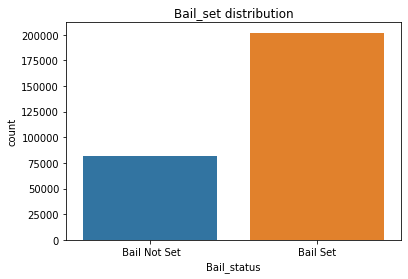

In [300]:
sns.countplot(x='Bail_status',data = final_baildf)
plt.title('Bail_set distribution')
position = (1,0)
labels = ("Bail Set", " Bail Not Set")
plt.xticks(position,labels)
plt.show()

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns

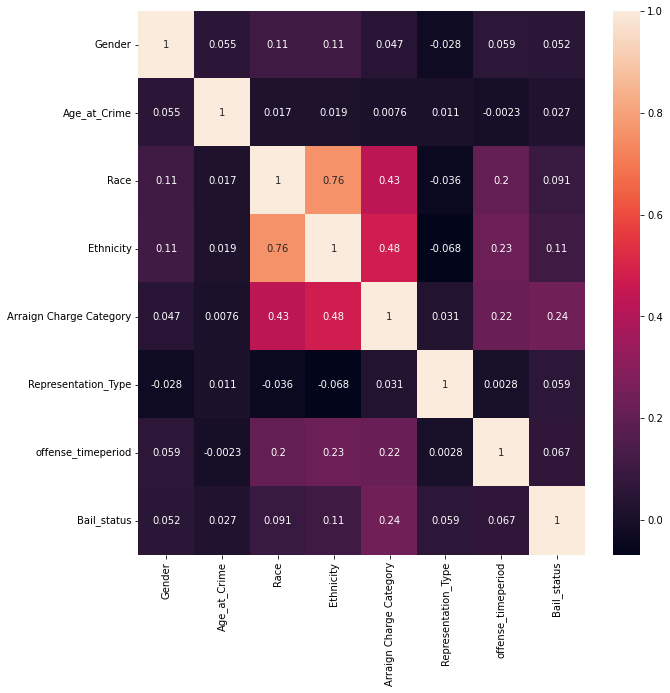

In [302]:
#Heatmap of the correlation of features
plt.figure(figsize=(10,10))
sns.heatmap(final_baildf.corr(), annot=True);

In [313]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [304]:
#Normalizing the final data to test and train in models
scaler = MinMaxScaler(feature_range = (0,1))
normalized_data = scaler.fit_transform(final_baildf)
columns = ['Gender', 'Race', 'Ethnicity', 'Arraign Charge Category','Representation_Type', 'age_group', 'offense_timeperiod','Bail_status']
normalized_df = pd.DataFrame(normalized_data, columns=columns)
normalized_df.head()

,Gender,Race,Ethnicity,Arraign Charge Category,Representation_Type,age_group,offense_timeperiod,Bail_status
0,0.998549,0.723255,0.876771,0.000000,0.731797,0.361693,0.999116,1.0
1,0.999988,0.715505,0.838098,0.813469,0.998815,0.430096,0.695540,1.0
2,0.999988,0.717453,0.000000,0.000000,0.348107,0.460568,0.695540,1.0
3,0.002443,0.723993,0.000137,0.000124,0.348182,0.430121,0.695650,0.0
4,1.000000,0.712733,0.876857,0.813513,0.561560,0.361713,0.999134,0.0


In [305]:
#Split Test and Train data as 20% and 80% respectively
X = normalized_df.iloc[:, :-1]
Y = normalized_df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

#Logistic Regression Model

In [306]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_predct_log = log_reg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_predct_log))

Accuracy: 0.7167898627243928


In [307]:
#Cross Validation for Logistic Regression
crs_val_logreg = cross_val_score(log_reg, X, Y, scoring='accuracy', cv=10)
crs_val_logreg = pd.Series(crs_val_logreg)
crs_val_logreg.mean()

0.7166486317198312

In [308]:
#Confusion Matrix for Logistic Regression Model
conf_matrix = confusion_matrix(Y_test, Y_predct_log)
print(conf_matrix)

[[ 1680 14810]
 [ 1282 39048]]


In [309]:
#Classification Report
print(classification_report(Y_test,Y_predct_log))

              precision    recall  f1-score   support

         0.0       0.57      0.10      0.17     16490
         1.0       0.73      0.97      0.83     40330

    accuracy                           0.72     56820
   macro avg       0.65      0.54      0.50     56820
weighted avg       0.68      0.72      0.64     56820



#Gaussian Naive Bayes Model

In [310]:
nb = GaussianNB()
nb.fit(X_train,Y_train)

Y_predct_nb = nb.predict(X_test)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_predct_nb))

Accuracy: 0.7022703273495248


In [311]:
#Cross Validation Report for Naive-Bayes
crs_val_nb = cross_val_score(nb, X, Y, scoring='accuracy', cv=10)
crs_val_rf = pd.Series(crs_val_nb)
crs_val_rf.mean()

0.7009849933160053

In [312]:
#Classification Report for Naive-Bayes 
print(classification_report(Y_test, Y_predct_nb))

              precision    recall  f1-score   support

         0.0       0.47      0.21      0.29     16490
         1.0       0.74      0.90      0.81     40330

    accuracy                           0.70     56820
   macro avg       0.60      0.56      0.55     56820
weighted avg       0.66      0.70      0.66     56820

